Neste notebook foi utilizado o algoritmo KNN para classificar se um título da Netflix é um filme ou uma série. Essa classificação usa apenas informações numéricas simples: a duração convertida para número e o ano de lançamento.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [9]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df['duration_num'] = df['duration'].str.replace('min', '', case=False)
df['duration_num'] = df['duration_num'].str.replace('Seasons', '', case=False)
df['duration_num'] = df['duration_num'].str.replace('Season', '', case=False)
df['duration_num'] = df['duration_num'].str.strip()
df['duration_num'] = pd.to_numeric(df['duration_num'])


dados = df[['duration_num', 'release_year', 'type']].dropna()
dados['type_bin'] = dados['type'].map({'Movie': 0, 'TV Show': 1})


Nesta célula eu transformei a coluna de duração em valor numérico, removendo “min” e “Season(s)”, e convertendo para número. Também removi linhas sem informação e transformei a coluna type em 0/1 (Movie = 0, TV Show = 1). Esses dados serão usados para treinar o modelo.

In [15]:
X = dados[['duration_num', 'release_year']]
y = dados['type_bin']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Aqui eu separei as variáveis de entrada (duration_num e release_year) e a variável alvo (type_bin). Depois dividi os dados em treino e teste e padronizei os valores com StandardScaler.

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f'Acurácia do classificador KNN: {acc:.3f}')


Acurácia do classificador KNN: 0.997


Nesta parte eu treinei o modelo KNN com 5 vizinhos usando os dados padronizados. Em seguida fiz as previsões no conjunto de teste e calculei a acurácia, ficando o modelo com um valor muito alto, mostrando que o modelo consegue diferenciar bem filmes de séries usando duração e ano.

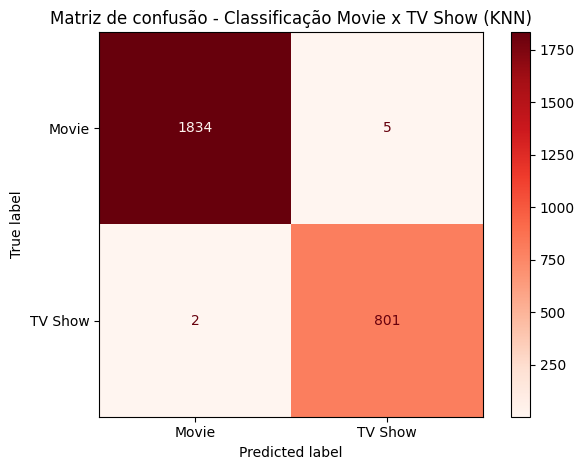

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Movie', 'TV Show'])
disp.plot(cmap='Reds')
plt.title('Matriz de confusão - Classificação Movie x TV Show (KNN)')
plt.tight_layout()
plt.show()

A matriz de confusão mostra que o KNN teve excelente desempenho, com pouquíssimos erros.

Isso acontece porque filmes e séries costumam ter características numéricas bastante diferentes, o que facilita a separação das classes.
O modelo conseguiu aproveitar bem essas diferenças, alcançando uma acurácia muito alta.